In [1]:
import sys
sys.path.append('/home/jovyan/workspace')

In [2]:
from modelscripts import arrhenius
from planetengine import quickShow
import planetengine
from planetengine import functions

In [3]:
system = arrhenius.build(res = 16, Ra = 1e4, eta0 = 10.)
planetengine.initials.apply(
    {'temperatureField': planetengine.initials.sinusoidal.IC()},
    system,
    )
system.solve()

Fitted 3 variables to the figure.



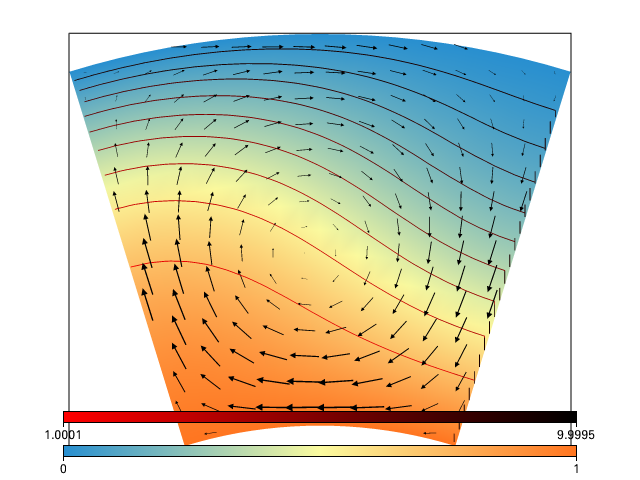

In [4]:
quickShow(system.temperatureField, system.velocityField, system.viscosityFn)

In [5]:
donut = arrhenius.build(res = 64, Ra = 1e4, aspect = 'max', f = 0.2, eta0 = 10.)
planetengine.initials.apply(
    {'temperatureField': planetengine.initials.sinusoidal.IC()},
    donut,
    )
donut.solve()

Fitted 3 variables to the figure.



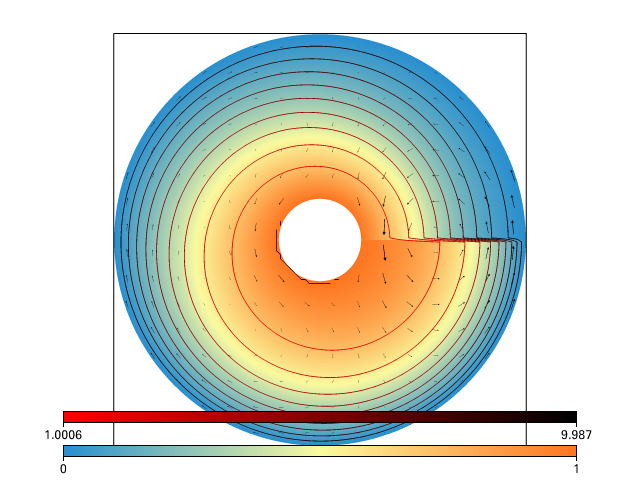

In [6]:
quickShow(donut.temperatureField, donut.velocityField, donut.viscosityFn)

In [7]:
planetengine.copyField(
    system.temperatureField,
    donut.temperatureField,
    freqs = (16., 4.),
    mirrored = (True, False),
    )

Mapping achieved at tolerance = 0.0002438714633303302


0.0002438714633303302

Fitted 2 variables to the figure.



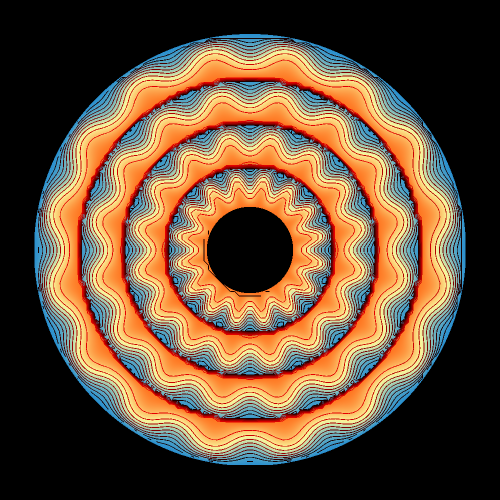

In [8]:
imgprefs = {
    'colourBar': False,
    'facecolour': 'black',
    'quality': 2,
    'figsize': (500, 500)
    }
quickShow(donut.temperatureField, donut.velocityField, donut.viscosityFn, **imgprefs)

In [9]:
for i in range(100):
    donut.iterate()

Fitted 2 variables to the figure.



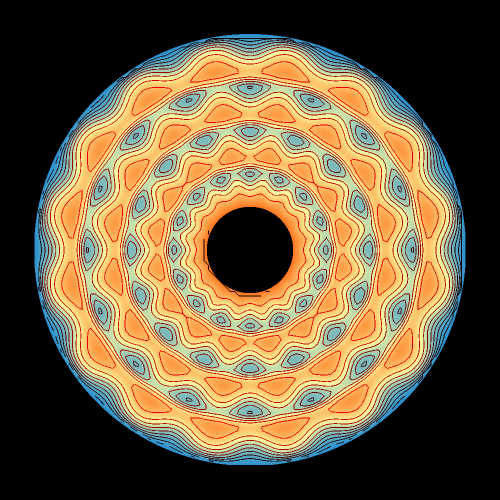

In [10]:
quickShow(donut.temperatureField, donut.velocityField, donut.viscosityFn, **imgprefs)

In [ ]:
myfig = planetengine.visualisation.QuickFig(donut.temperatureField, donut.velocityField, donut.viscosityFn, **imgprefs)

In [ ]:
myfig.add_arrows(functions.get_planetVar(donut.velocityField))

In [ ]:
myfig.show()